In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

# basic packages
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import os
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option("display.precision", 2)
from IPython.display import Image

# visulization
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

np.bool = np.bool_



In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder


# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import lightgbm as lgb

2023-09-12 12:13:56.854512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# training data without labels
import io

df = pd.read_csv('./Data/dengue_features_train.csv')#, index_col=[0,1,2])
y = pd.read_csv('./Data/dengue_labels_train.csv')#,index_col=[0,1,2])
test = pd.read_csv('./Data/dengue_features_test.csv')#,index_col=[0,1,2])

# /content/submission_format.csv


#training data with labels
#df = pd.merge(features, label, how='left', on =['city', 'year', 'weekofyear'])

In [7]:
y.describe()

,year,weekofyear,total_cases
count,1456.00,1456.00,1456.00
mean,2001.03,26.50,24.68
std,5.41,15.02,43.60
min,1990.00,1.00,0.00
25%,1997.00,13.75,5.00
50%,2002.00,26.50,12.00
75%,2005.00,39.25,28.00
max,2010.00,53.00,461.00


#### SJ data starts from 1990-04-30  ends with 2008-04-22, total 936 rows, no missing first row of values
#### IQ data starts from 2000-07-01  ends with 2010-06-25, total 520 rows, no missing first row of values

In [8]:
df[df['city']=='sj']
df[df['city']=='iq'].head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,1.23e-01,0.10,0.20,0.18,12.42,297.57,297.74,292.41,299.8,295.9,32.00,73.37,12.42,14.01,2.63,25.44,6.90,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,1.70e-01,0.14,0.16,0.16,22.82,298.21,298.44,293.95,300.9,296.4,17.94,77.37,22.82,15.37,2.37,26.71,6.37,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,3.23e-02,0.17,0.16,0.17,34.54,298.78,298.88,295.43,300.5,297.3,26.10,82.05,34.54,16.85,2.30,26.71,6.49,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,1.29e-01,0.25,0.23,0.24,15.36,298.99,299.23,295.31,301.4,297.0,13.90,80.34,15.36,16.67,2.43,27.47,6.77,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,1.96e-01,0.26,0.25,0.25,7.52,299.52,299.66,295.82,301.9,297.5,12.20,80.46,7.52,17.21,3.01,28.94,9.37,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,7.79e-02,-0.04,0.31,0.30,27.19,296.96,296.96,292.10,299.7,294.4,7.55,74.25,27.19,13.64,2.89,25.04,5.79,30.0,21.1,1.8
932,sj,2008,14,2008-04-01,-3.80e-02,-0.02,0.12,0.07,3.82,298.08,298.23,293.24,299.8,296.5,3.67,74.60,3.82,14.66,2.71,26.24,6.81,30.6,22.2,0.5
933,sj,2008,15,2008-04-08,-1.55e-01,-0.05,0.14,0.14,16.96,297.46,297.56,292.73,299.4,295.8,35.00,75.03,16.96,14.18,2.19,25.00,5.71,29.4,21.7,30.7
934,sj,2008,16,2008-04-15,1.80e-03,NaN,0.20,0.21,0.00,297.63,297.78,292.27,299.7,295.9,4.82,72.29,0.00,13.86,2.79,25.31,6.24,29.4,21.7,11.2


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.19,0.13,0.34,0.25,25.41,296.74,298.45,295.18,307.3,293.1,43.19,92.42,25.41,16.65,8.93,26.4,10.78,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.22,0.28,0.29,0.24,60.61,296.63,298.43,295.36,306.6,291.1,46.00,93.58,60.61,16.86,10.31,26.9,11.57,34.0,20.8,55.6


In [9]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.00,1456.00,1262.00,1404.00,1434.00,1434.00,1443.00,1446.00,1446.00,1446.00,1446.00,1446.00,1446.00,1446.00,1443.00,1446.00,1446.00,1413.00,1413.00,1436.00,1442.00,1434.00
mean,2001.03,26.50,0.14,0.13,0.20,0.20,45.76,298.70,299.23,295.25,303.43,295.72,40.15,82.16,45.76,16.75,4.90,27.19,8.06,32.45,22.10,39.33
std,5.41,15.02,0.14,0.12,0.07,0.08,43.72,1.36,1.26,1.53,3.23,2.57,43.43,7.15,43.72,1.54,3.55,1.29,2.13,1.96,1.57,47.46
min,1990.00,1.00,-0.41,-0.46,-0.02,-0.06,0.00,294.64,294.89,289.64,297.80,286.90,0.00,57.79,0.00,11.72,1.36,21.40,4.53,26.70,14.70,0.00
25%,1997.00,13.75,0.04,0.05,0.16,0.14,9.80,297.66,298.26,294.12,301.00,293.90,13.05,77.18,9.80,15.56,2.33,26.30,6.51,31.10,21.10,8.70
50%,2002.00,26.50,0.13,0.12,0.20,0.19,38.34,298.65,299.29,295.64,302.40,296.20,27.24,80.30,38.34,17.09,2.86,27.41,7.30,32.80,22.20,23.85
75%,2005.00,39.25,0.25,0.22,0.25,0.25,70.23,299.83,300.21,296.46,305.50,297.90,52.20,86.36,70.23,17.98,7.62,28.16,9.57,33.90,23.30,53.90
max,2010.00,53.00,0.51,0.45,0.54,0.55,390.60,302.20,302.93,298.45,314.00,299.90,570.50,98.61,390.60,20.46,16.03,30.80,15.80,42.20,25.60,543.30


### 2.1 Features
* Total 20 Features

1. NOAA's GHCN daily climate data weather station measurements (start from here we need to look at the data by each city)
* station_max_temp_c – Maximum temperature
* station_min_temp_c – Minimum temperature
* station_avg_temp_c – Average temperature
* station_precip_mm – Total precipitation
* station_diur_temp_rng_c – Diurnal temperature range

2. PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
* precipitation_amt_mm – Total precipitation

3. NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
* reanalysis_sat_precip_amt_mm – Total precipitation
* reanalysis_dew_point_temp_k – Mean dew point temperature
* reanalysis_air_temp_k – Mean air temperature
* reanalysis_relative_humidity_percent – Mean relative humidity
* reanalysis_specific_humidity_g_per_kg – Mean specific humidity
* reanalysis_precip_amt_kg_per_m2 – Total precipitation
* reanalysis_max_air_temp_k – Maximum air temperature
* reanalysis_min_air_temp_k – Minimum air temperature
* reanalysis_avg_temp_k – Average air temperature
* reanalysis_tdtr_k – Diurnal temperature range

4. Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements (monitoring vegetation and crop conditions)
* ndvi_se – Pixel southeast of city centroid
* ndvi_sw – Pixel southwest of city centroid
* ndvi_ne – Pixel northeast of city centroid
* ndvi_nw – Pixel northwest of city centroid

- we have city, year, weekofyear, we dont need repeated week information, we can drop the "week_start_date"
- there is 1 categorical variables in the table, city, we can focus on how to analyze the numerical variables and deal with the missing value and preprocessing before feeding to the models


### 2.2 check NAs
- Check the na values in our training/testing features; drop the columns if it contains a lot of null value, use different methods to fill the na
- here we found that there are 20 columns has NAs, especially the ndvi_ne feature (~ 13.3% for the train, ~ 10.3% for the test) is it worth to fill the missing value for this variable? we can discuss it later during feature selection part
- now we need to understand what are they represent of, then we can fill the value

#### Observations
- In the 20 features  climate data, only Satellite vegatation index(NVDI) values are normalized
- The temperture values are in different units, Kelvin & Celsius.
- These features all have some missing values, we should fill the NAs since it is a time series problem and also not a large dataset;

In [10]:
# Check the na values in our training features
train_percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_train = pd.DataFrame({'column_name':  df.columns,
                                 'percent_missing': train_percent_missing})

test_percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': test_percent_missing})

missing_value_train
missing_value_test

,column_name,percent_missing
city,city,0.00
year,year,0.00
weekofyear,weekofyear,0.00
week_start_date,week_start_date,0.00
ndvi_ne,ndvi_ne,13.32
ndvi_nw,ndvi_nw,3.57
ndvi_se,ndvi_se,1.51
ndvi_sw,ndvi_sw,1.51
precipitation_amt_mm,precipitation_amt_mm,0.89
reanalysis_air_temp_k,reanalysis_air_temp_k,0.69


,column_name,percent_missing
city,city,0.00
year,year,0.00
weekofyear,weekofyear,0.00
week_start_date,week_start_date,0.00
ndvi_ne,ndvi_ne,10.34
ndvi_nw,ndvi_nw,2.64
ndvi_se,ndvi_se,0.24
ndvi_sw,ndvi_sw,0.24
precipitation_amt_mm,precipitation_amt_mm,0.48
reanalysis_air_temp_k,reanalysis_air_temp_k,0.48


#### Convert catrgorical variable
#### Two methonds to fill NAs:
1. forwardfill – ffill : Fill NA/NaN values by propagating the last valid observation to next valid
    - ffill is more appropriate when the missing values are at the beginning of the dataset, while bfill is more appropriate when the missing values are at the end of the dataset. Since our data doesn't have missing data in the beginning row, we can use ffill.
    - temperature values: if we fill by Mean/Median, it might not make sense, since temperature varies with datetype data,the values should be similar with the most recent value around to that point
2. use Interpolate() Method with limit parameter e.g linear
#### create new month/season variable
#### week of year has 53, change it into 1, this is an error

## We should build 2 models for each city

In [11]:
# Step 1: fillna with most recent value , should use for different cities (2 seperate tables)
def fill_na(df):
    for feature in df.keys():
        df[feature].fillna(method='ffill', inplace=True)
    return df



In [12]:
# Step 2: Create an instance of One-hot-encoder
# City is the only categorical variable in the data

def categorical(df):
    encoder = OneHotEncoder()
    enc_data = pd.DataFrame(encoder.fit_transform(df[['city']]).toarray())
    enc_data.columns = ['iq', 'sj']
    # Merge with main data
    df = df.join(enc_data)
    return df

In [13]:
# Step 3 : fix wrong values
def wrong_week_num(df):
    df.loc[df["weekofyear"] == 53, "weekofyear"] = 1
    return df

In [15]:
def season_feature(df):
    df['season']=0
    df['month'] = pd.DatetimeIndex(df['week_start_date']).month.astype(int)
    df.loc[(df['month'] >= 3) & (df['month'] <6), 'season'] = 1
    df.loc[(df['month'] >= 6) & (df['month'] <9), 'season'] = 2
    df.loc[(df['month'] >= 9) & (df['month'] <12), 'season'] = 3
    df.loc[(df['month'] == 12) & (df['month'] <=2), 'season'] = 4
    return df


In [16]:
def other_time_features(df):
    day = 60*60*24
    week = 7*day
    year = 365.2425*day
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])#, format='%Y.%m.%d %H:%M:%S') # convert datetype
    df['Seconds'] = df['week_start_date'].map(pd.Timestamp.timestamp) # convert to Seconds
    df['week_sin'] = np.sin(df['Seconds'] * (2* np.pi / week))
    df['week_cos'] = np.cos(df['Seconds'] * (2 * np.pi / week))
    df['year_sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
    df['year_cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
    df=df.drop(['Seconds', 'week_start_date'], axis=1)
    return df

In [17]:
def data_cleaning(df, city):
    df_new = df[df.city == city]
    df_new = fill_na(df_new)
    df_new = wrong_week_num(df_new)
    df_new = season_feature(df_new)
    df_new = other_time_features(df_new)
    return df_new

### Split dataset for each city

In [18]:
# feature data
sj_Xdata = data_cleaning(df, 'sj').drop(['city'], axis=1)
iq_Xdata = data_cleaning(df, 'iq').drop(['city'], axis=1)

# output total cases
sj_y = y[y.city == 'sj'].total_cases
iq_y = y[y.city == 'iq'].total_cases

# test data
sj_test_data = data_cleaning(test, 'sj').drop(['city'], axis=1)
iq_test_data = data_cleaning(test, 'iq').drop(['city'], axis=1)

### Lets work on feature selection
1. consider correlation
2. use rfe to select features

### standardization or normalization data
##### all weather related data can be normalized, year, week of year, month, and season variable will be MinMax Standardizated into [0,1] range

Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees . These algorithms utilize rules (series of inequalities) and do not require normalization
LSTM better normalization


* we will try lightgbm (without normalization / scaling)
* LSTM with normalization / scaling

In [19]:
# normalize & scaling data
# ['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'] already normalized, no need to normalize again
norm_cols = ['precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
        'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
        'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
        'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
        'station_min_temp_c', 'station_precip_mm']

minmax_cols = ['year', 'weekofyear','month','season'] # keep in [0,1]



def data_scaling(df):
    df_new = df.copy()
    # Normalize weather data (z = (x - u) / s)
    df_new[norm_cols] = StandardScaler().fit_transform(df_new[norm_cols])

    # Min max standardizate year and week no but within (0,1)
    df_new[minmax_cols] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_new[minmax_cols])
    return df_new

In [20]:
# Feature transformation 

sj_Xdata = data_scaling(sj_Xdata)
iq_Xdata = data_scaling(iq_Xdata)

sj_test_data = data_scaling(sj_test_data)
iq_test_data = data_scaling(iq_test_data)

In [21]:
# Remove highly correlated features 
def remove_corr(df, treshold=0.9):
    corr_matrix=df.corr().abs()
    upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop=[col for col in upper.columns if any(upper[col]>treshold)]
    new_df = df.drop(to_drop,axis=1)
    return to_drop


In [22]:
print("SJ data need to drop following highly correlated variables:",\
      remove_corr(sj_Xdata, treshold=0.85))
sj_corr_cols = remove_corr(sj_Xdata, treshold=0.85)
sj_X_data = sj_Xdata.drop(sj_corr_cols, axis=1)

sj_test_set= sj_test_data.drop(sj_corr_cols ,  axis =1)



print("IQ data need to drop following highly correlated variables:",\
      remove_corr(iq_Xdata, treshold=0.85))
iq_corr_cols = remove_corr(iq_Xdata, treshold=0.85)
iq_X_data = iq_Xdata.drop(iq_corr_cols, axis=1)

iq_test_set= iq_test_data.drop(iq_corr_cols ,  axis =1)



SJ data need to drop following highly correlated variables: ['reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c', 'month']
IQ data need to drop following highly correlated variables: ['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'month']


In [23]:
# SJ - 14 columns left ; IQ - 19 columns left
sj_X_data.head(1)
iq_X_data.head(1)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_diur_temp_rng_c,station_precip_mm,season,week_sin,week_cos,year_sin,year_cos
0,0.0,0.33,0.12,0.1,0.2,0.18,-0.51,-1.28,0.05,-1.54,0.23,0.17,-0.37,0.33,-0.43,-0.9,0.89,-0.46


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,season,week_sin,week_cos,year_sin,year_cos
936,0.0,0.49,0.19,0.13,0.34,0.25,-1.11,-0.97,-0.22,0.1,0.13,-0.29,0.5,-1.22,0.19,-1.08,-0.41,-0.93,0.67,0.97,-0.22,0.02,-1.0


In [28]:
from sklearn.model_selection import cross_validate
sj_lgtrain = lgb.Dataset(sj_X_data[:800], label=sj_y[:800])
sj_lgval = lgb.Dataset(sj_X_data[800:], label=sj_y[800:])

In [29]:
params = {
    "objective": "regression",
    "metric": "l1",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    #'bagging_fraction': 0.7,
    'num_leaves': 25,
    #'max_depth': 5,
    #'bagging_freq': 10,
    "num_iterations": 50000
}

In [30]:
# lightgbm
model = lgb.train(params, train_set = sj_lgtrain,  valid_sets=[sj_lgval],num_boost_round=1000, early_stopping_rounds=20)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3659
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 18
[LightGBM] [Info] Start training from score 35.863750
[1]	valid_0's l1: 25.5282
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l1: 25.0501
[3]	valid_0's l1: 24.4055
[4]	valid_0's l1: 23.8259
[5]	valid_0's l1: 23.2956
[6]	valid_0's l1: 22.8474
[7]	valid_0's l1: 22.4548
[8]	valid_0's l1: 22.1805
[9]	valid_0's l1: 21.8169
[10]	valid_0's l1: 21.3055
[11]	valid_0's l1: 21.1655
[12]	valid_0's l1: 20.7851
[13]	valid_0's l1: 20.4366
[14]	valid_0's l1: 20.2757
[15]	valid_0's l1: 20.0005
[16]	valid_0's l1: 19.6863
[17]	valid_0's l1: 19.499
[18]	valid_0's l1: 19.3774
[19]	valid_0's l1: 19.1721
[20]	valid_0's l1: 18.9134
[21]	valid_0's l1: 18.6812
[22]	valid_0's l1: 18.585
[23]	valid_0

In [136]:
sj_val_yhat = model.predict(sj_X_data[800:], num_iteration=model.best_iteration)
print('The mae of prediction is:', round(mean_absolute_error(sj_val_yhat, sj_y[800:]) , 3))

The mae of prediction is: 17.598


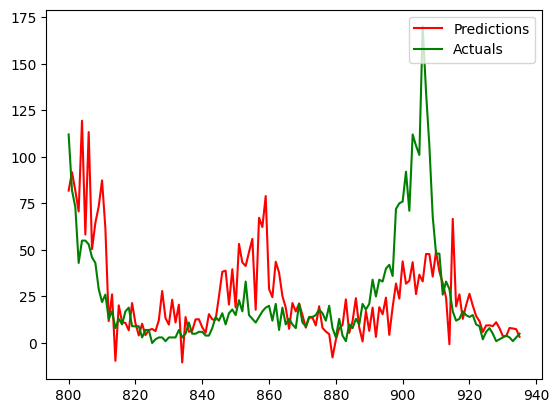

In [137]:
sj_val_results = pd.DataFrame(data={'Val Predictions':sj_val_yhat, 'Actuals':sj_y[800:]})
plt.plot(sj_val_results['Val Predictions'], color='red',label="Predictions")
plt.plot(sj_val_results['Actuals'], color='green',label="Actuals")
plt.legend(loc='upper right')


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

Text(0.5, 1.0, 'LightGBM - Feature Importance')

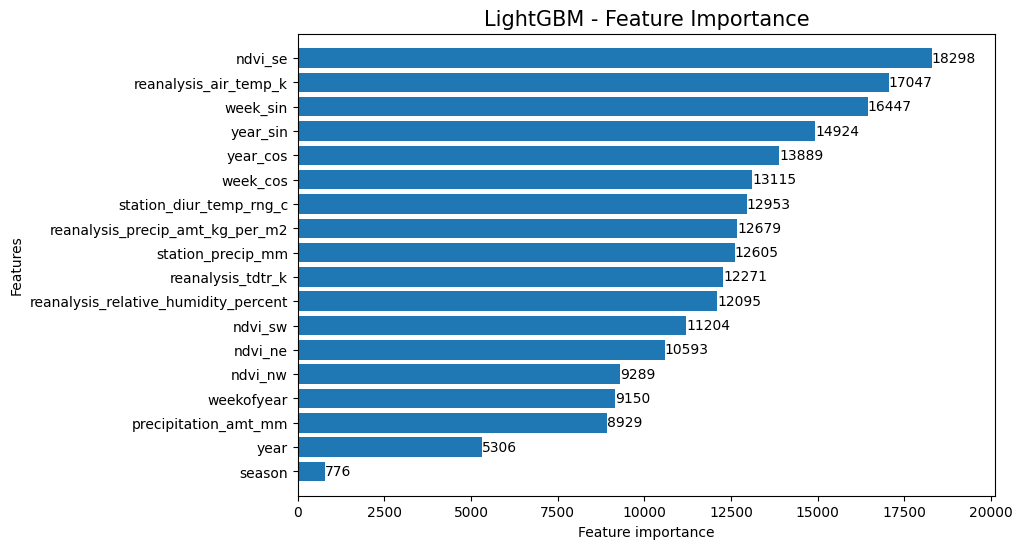

In [100]:
fig, ax = plt.subplots(figsize=(9,6))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

<Axes: >

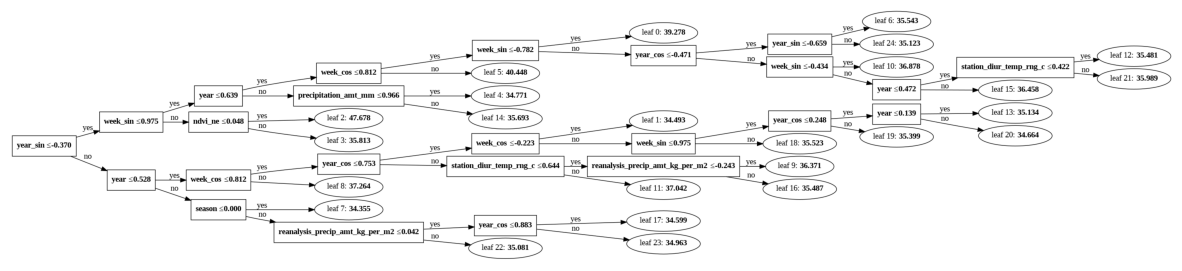

In [138]:
lgb.plot_tree(model,figsize=(15,10))

### IQ model

In [171]:
hyper_params = {
    "objective": "regression",
    "metric": "mae",
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
    "feature_fraction": 0.85,
    #'bagging_fraction': 0.7,
    'num_leaves': 25,
    'max_depth': 5,
    #'bagging_freq': 10,
    "num_iterations": 50000
}

In [172]:
from sklearn.model_selection import cross_validate
iq_lgtrain = lgb.Dataset(iq_X_data[:420], label=iq_y[:420])
iq_lgval = lgb.Dataset(iq_X_data[420:], label=iq_y[420:])

In [173]:
# lightgbm
iq_model = lgb.train(hyper_params, train_set = iq_lgtrain,  valid_sets=[iq_lgval],num_boost_round=500)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [182]:
iq_val_yhat = iq_model.predict(iq_X_data[420:], num_iteration=iq_model.best_iteration)
print('The mae of prediction is:', round(mean_absolute_error(iq_val_yhat, iq_y[420:]) , 3))

The mae of prediction is: 10.858


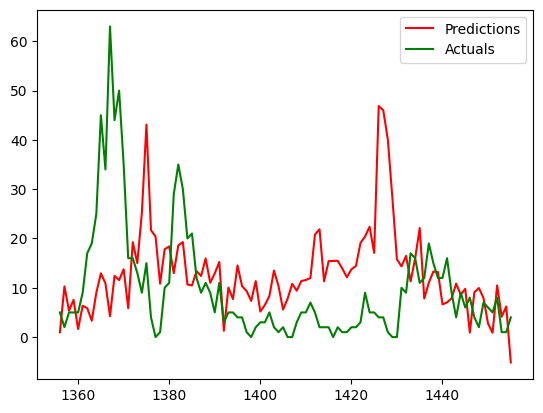

In [183]:
iq_val_results = pd.DataFrame(data={'Val Predictions':iq_val_yhat, 'Actuals':iq_y[420:]})
plt.plot(iq_val_results['Val Predictions'], color='red',label="Predictions")
plt.plot(iq_val_results['Actuals'], color='green',label="Actuals")
plt.legend(loc='upper right')


In [179]:
# combine test data
#pred_val_y =
sj_pred = model.predict(sj_test_set, num_iteration=model.best_iteration)
sj_pred[sj_pred<0] = 0

In [185]:
iq_pred = iq_model.predict(iq_test_set, num_iteration=iq_model.best_iteration)
iq_pred[iq_pred<0] = 0

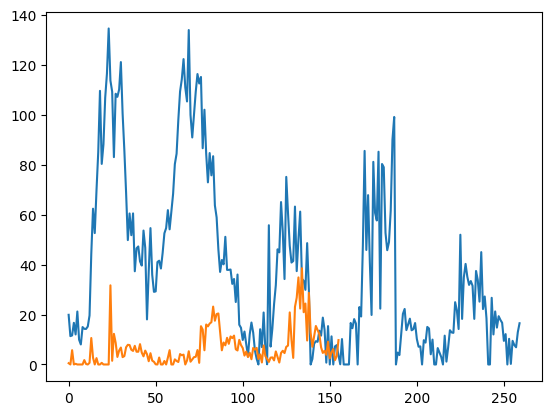

In [187]:
plt.plot(sj_pred)

plt.plot(iq_pred)

In [188]:

pred=pd.read_csv('submission_format.csv')#, index=[0,1,2])
pred = pred.set_index(['city','year','weekofyear']).drop('total_cases', axis=1)
pred

Empty DataFrame
Columns: []
Index: [(sj, 2008, 18), (sj, 2008, 19), (sj, 2008, 20), (sj, 2008, 21), (sj, 2008, 22), (sj, 2008, 23), (sj, 2008, 24), (sj, 2008, 25), (sj, 2008, 26), (sj, 2008, 27), (sj, 2008, 28), (sj, 2008, 29), (sj, 2008, 30), (sj, 2008, 31), (sj, 2008, 32), (sj, 2008, 33), (sj, 2008, 34), (sj, 2008, 35), (sj, 2008, 36), (sj, 2008, 37), (sj, 2008, 38), (sj, 2008, 39), (sj, 2008, 40), (sj, 2008, 41), (sj, 2008, 42), (sj, 2008, 43), (sj, 2008, 44), (sj, 2008, 45), (sj, 2008, 46), (sj, 2008, 47), (sj, 2008, 48), (sj, 2008, 49), (sj, 2008, 50), (sj, 2008, 51), (sj, 2008, 52), (sj, 2009, 1), (sj, 2009, 2), (sj, 2009, 3), (sj, 2009, 4), (sj, 2009, 5), (sj, 2009, 6), (sj, 2009, 7), (sj, 2009, 8), (sj, 2009, 9), (sj, 2009, 10), (sj, 2009, 11), (sj, 2009, 12), (sj, 2009, 13), (sj, 2009, 14), (sj, 2009, 15), (sj, 2009, 16), (sj, 2009, 17), (sj, 2009, 18), (sj, 2009, 19), (sj, 2009, 20), (sj, 2009, 21), (sj, 2009, 22), (sj, 2009, 23), (sj, 2009, 24), (sj, 2009, 25), (sj, 2009, 26), (sj, 2009, 27), (sj, 2009, 28), (sj, 2009, 29), (sj, 2009, 30), (sj, 2009, 31), (sj, 2009, 32), (sj, 2009, 33), (sj, 2009, 34), (sj, 2009, 35), (sj, 2009, 36), (sj, 2009, 37), (sj, 2009, 38), (sj, 2009, 39), (sj, 2009, 40), (sj, 2009, 41), (sj, 2009, 42), (sj, 2009, 43), (sj, 2009, 44), (sj, 2009, 45), (sj, 2009, 46), (sj, 2009, 47), (sj, 2009, 48), (sj, 2009, 49), (sj, 2009, 50), (sj, 2009, 51), (sj, 2009, 52), (sj, 2010, 53), (sj, 2010, 1), (sj, 2010, 2), (sj, 2010, 3), (sj, 2010, 4), (sj, 2010, 5), (sj, 2010, 6), (sj, 2010, 7), (sj, 2010, 8), (sj, 2010, 9), (sj, 2010, 10), (sj, 2010, 11), (sj, 2010, 12), ...]

[416 rows x 0 columns]

In [189]:
pred['total_cases'] = pd.DataFrame(sj_pred).append(pd.DataFrame(iq_pred)).to_numpy()
pred= pred[['total_cases']].round(0).astype(int)
pred

total_cases
city year weekofyear             
sj   2008 18                   20
          19                   11
          20                   12
          21                   17
          22                   12
...                           ...
iq   2013 22                    5
          23                    6
          24                    2
          25                    3
          26                   10

[416 rows x 1 columns]

In [190]:
pred.to_csv('lightgbm_results.csv')